<a href="https://colab.research.google.com/github/TetianaHrunyk/Time-series-analysis/blob/main/TrendsExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import numpy as np
from datetime import datetime, timedelta

plt.rcParams["figure.figsize"] = (22, 6)
sns.set_style("whitegrid")

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#@title Data Inputs
symbol = "EURUSD=X"
end = datetime.utcnow()
start = end - timedelta(days=365*10)
interval = "1D"

In [ ]:
sym = yf.Ticker(symbol)

In [ ]:
df = sym.history(interval=interval, start=start, end=end)

In [ ]:
df.index = pd.to_datetime(df.index)
# df.drop(["Volume", "Adj Close"], axis=1, inplace=True)

In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2603.000000,2603.000000,2603.000000,2603.000000,2603.0,2603.0,2603.0
mean,1.155959,1.159585,1.152277,1.155980,0.0,0.0,0.0
std,0.090650,0.090310,0.090923,0.090651,0.0,0.0,0.0
min,0.959619,0.967006,0.954016,0.959619,0.0,0.0,0.0
25%,1.097514,1.101058,1.093195,1.097508,0.0,0.0,0.0
50%,1.131836,1.135847,1.128599,1.131952,0.0,0.0,0.0
75%,1.188524,1.191980,1.185185,1.188403,0.0,0.0,0.0
max,1.392990,1.399110,1.391260,1.393088,0.0,0.0,0.0


# Visualization

In [ ]:
ma_period = 25

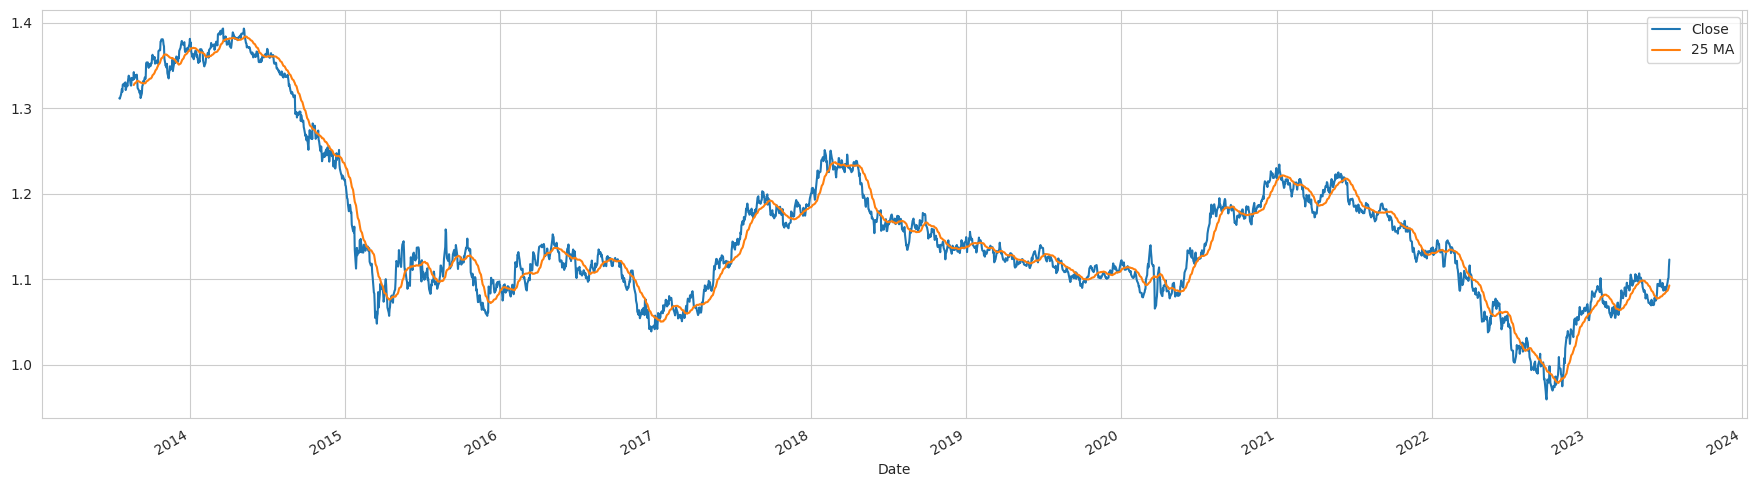

In [ ]:
df["Close"].plot();
df["Close"].rolling(window=ma_period).mean().plot(label=f"{ma_period} MA");
plt.legend();

# Explore Closing stats

In [ ]:
df['Date'] = df.index.to_numpy()

In [ ]:
df["Weekday"] = df["Date"].apply(lambda x: x.weekday())

In [ ]:
df["Year"] = df["Date"].apply(lambda x: x.year)

In [ ]:
df.groupby("Weekday").mean()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year
Weekday,,,,,,,,
0,1.155672,1.159149,1.152696,1.155678,0.0,0.0,0.0,2018.038388
1,1.155690,1.159327,1.152069,1.155724,0.0,0.0,0.0,2018.052023
2,1.156024,1.159379,1.152449,1.156035,0.0,0.0,0.0,2018.042308
3,1.156273,1.160308,1.152126,1.156303,0.0,0.0,0.0,2018.038388
4,1.156135,1.159759,1.152047,1.156157,0.0,0.0,0.0,2018.040230


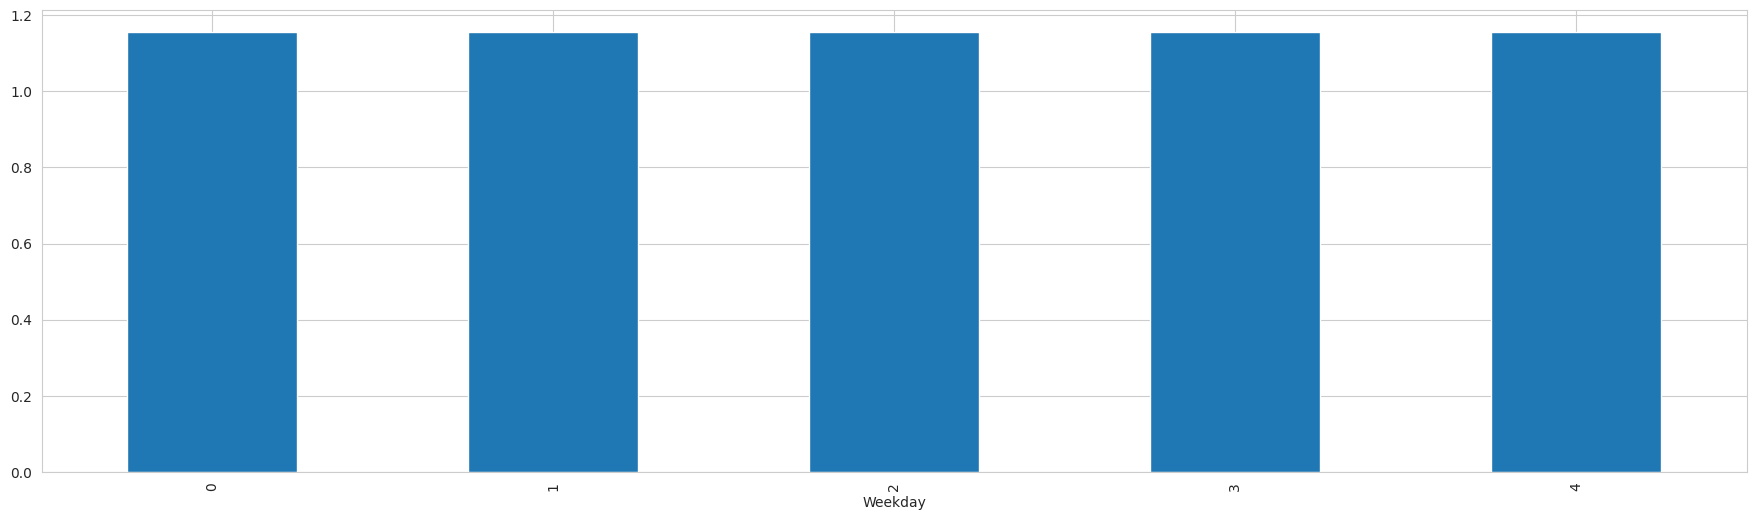

In [ ]:
# (df.groupby("Weekday").mean()["Close"]-1.1).plot(kind="bar");
df.groupby("Weekday").mean()["Close"].plot(kind="bar");

In [ ]:
df.groupby("Year").mean()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Weekday
Year,,,,,,,,
2013,1.347730,1.351259,1.344259,1.347740,0.0,0.0,0.0,2.008475
2014,1.329088,1.332128,1.325668,1.329099,0.0,0.0,0.0,2.000000
2015,1.110392,1.115682,1.105141,1.110387,0.0,0.0,0.0,2.003831
2016,1.107090,1.111083,1.103185,1.107110,0.0,0.0,0.0,2.007663
2017,1.129315,1.132780,1.126167,1.129330,0.0,0.0,0.0,2.000000
2018,1.181316,1.184981,1.177585,1.181330,0.0,0.0,0.0,1.992337
2019,1.119809,1.122107,1.117334,1.119835,0.0,0.0,0.0,1.996154
2020,1.141790,1.145647,1.138118,1.141856,0.0,0.0,0.0,2.003817
2021,1.183170,1.185783,1.180146,1.183219,0.0,0.0,0.0,2.007663


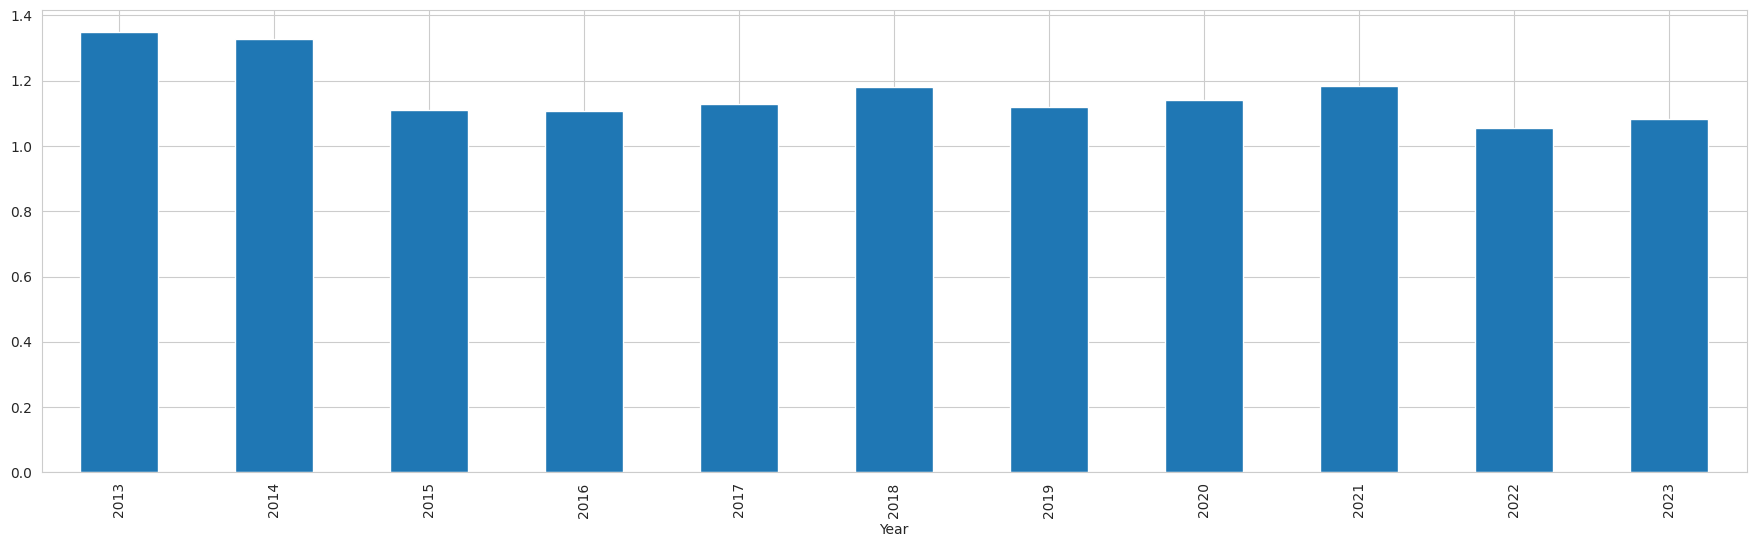

In [ ]:
df.groupby("Year").mean()["Close"].plot(kind="bar");

# Prices above and below the MA

In [ ]:
ma_period = 50

In [ ]:
ma_column = f"MA{ma_period} Close"
df[ma_column] = df["Close"].rolling(window=ma_period).mean()
df.dropna(inplace=True)

In [ ]:
above = df[df.Close > df[ma_column]].groupby("Weekday")["Close"].sum()
below = df[df.Close < df[ma_column]].groupby("Weekday")["Close"].sum()

In [ ]:
above_below_df = pd.DataFrame({"Above": above, "Below": below})

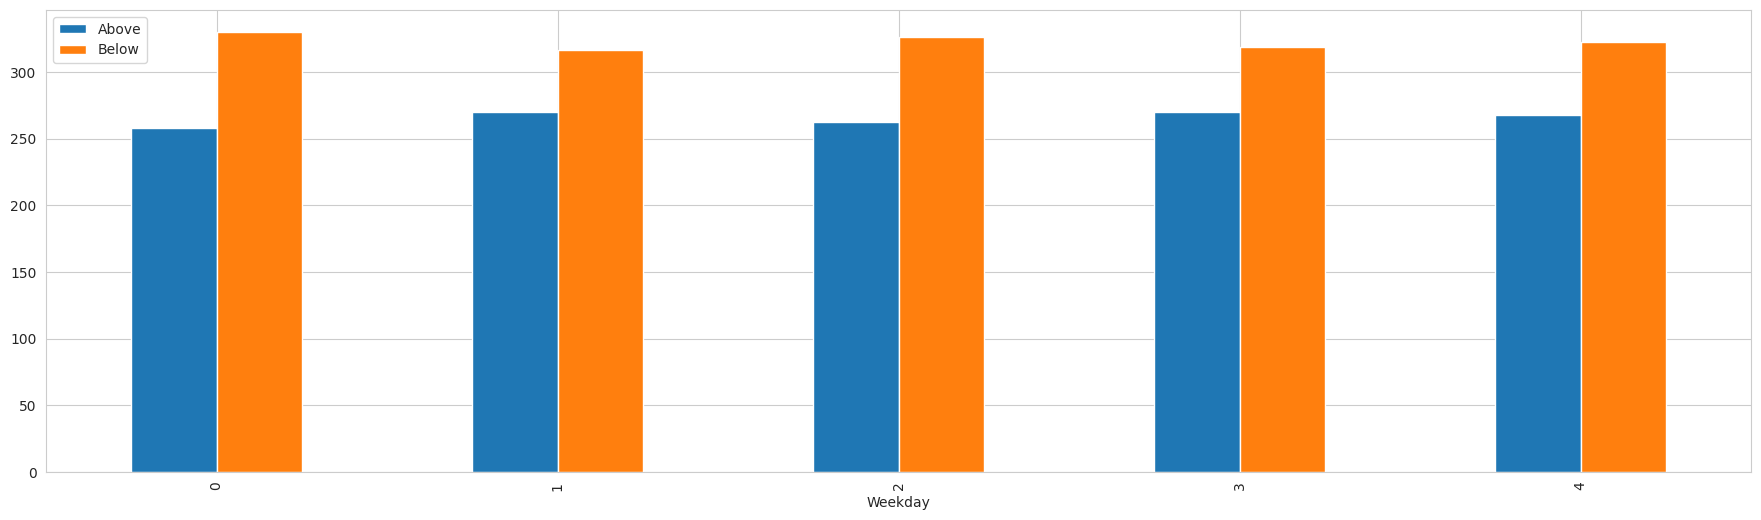

In [ ]:
above_below_df.plot(kind="bar");

# Avg consecutive ups/downs

In [ ]:
up, down = 0, 0
ups, downs = [0], [0]

for i in range(1, len(df)):
  if df.iloc[i]["Close"] >= df.iloc[i-1]["Close"]:
    up += 1
    down = 0
  else:
    down += 1
    up = 0
  ups.append(up)
  downs.append(down)

In [ ]:
# Close
df["Conseq Up"] = ups
df["Conseq Down"] = downs

In [ ]:
df[df["Conseq Down"]>0]["Conseq Down"].mean()

1.9243959469992207

In [ ]:
df[df["Conseq Up"]>0]["Conseq Up"].mean()

1.9

# Avg difference between two consequtive timestamps

In [ ]:
diff1  = df.diff(periods=1)
diff1.dropna(inplace=True)

In [ ]:
diff1.describe()[["Open", "High", "Low", "Close"]].transpose()

,count,mean,std,min,25%,50%,75%,max
Open,2553.0,-0.000088,0.005625,-0.029506,-0.003354,-0.000058,0.003184,0.030635
High,2553.0,-0.000090,0.005170,-0.034669,-0.002867,-0.000252,0.002686,0.033689
Low,2553.0,-0.000088,0.004982,-0.040095,-0.002748,0.000001,0.002721,0.031600
Close,2553.0,-0.000088,0.005640,-0.030420,-0.003369,-0.000056,0.003150,0.030295
